In [66]:
## Importing Libraries

In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Preprocessing the data in which is in form of images
training_set=tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    # Takes the names of folders as labels
    label_mode="categorical",
    # We didn't take int as we are not doing two class problem but we are solving a multi class problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    # To speed up training process increase batch size
    image_size=(128, 128),
    shuffle=True,
    # Reduce biasness to learn from all end . It will randomly take data and learn better
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [69]:
# Preprocessing the data in valid folder
validation_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    # Takes the names of folders as labels
    label_mode="categorical",
    # We didn't take int as we are not doing two class problem but we are solving a multi class problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    # To speed up training process increase batch size
    image_size=(128, 128),
    shuffle=True,
    # Reduce biasness to learn from all end . It will randomly take data and learn better
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [70]:
#training_set

In [71]:
#Dimensions of Images and it also tells how many classes and batch size(Images processed in one go).
# for x,y in training_set:
#     print(x,x.shape)
#     print(y,y.shape)
#     break

In [72]:
# To avoid Overshooting
# 1. Choose small learning rate default is 0.001 we are taking 0.0001
# 2. There may be a chance of underfitting(not able to capture entire information of data set) so increase number of neuron
# 3. Add more Convolution layer to extract more feature form images there may be possibility that model is unable to capture relevant feature or model is confusing due to lack of feature


In [73]:
# Building Model

In [74]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [75]:
# Creating Sequential object
model=Sequential();

In [76]:
## Building Convolution Layer

In [77]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[128,128,3]))
# 32 matrix or filter maps of size 3x3
# In input_shape 3 is rgb format of array
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))
# Size of sliding windows is pool_size and movement is stride

d:\Plant Disease Detection\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [79]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [80]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [81]:
model.add(Conv2D(filters=512,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [82]:
model.add(Dropout(0.25))
# Avoid overfitting

In [83]:
model.add(Flatten())
#Flattening the layer

In [84]:
model.add(Dense(units=1500,activation="relu"))

In [85]:
model.add(Dropout(0.4))

In [86]:
# Output Layer
model.add(Dense(units=38,activation="softmax"))
# Softmax will determine the probability of every class and choose best one we choose 38 because we have 38 classes 

In [87]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [88]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Training Model

In [90]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1282s 582ms/step - accuracy: 0.4051 - loss: 2.1146 - val_accuracy: 0.8100 - val_loss: 0.6039
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1347s 613ms/step - accuracy: 0.8379 - loss: 0.5103 - val_accuracy: 0.9041 - val_loss: 0.2936
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1276s 581ms/step - accuracy: 0.9091 - loss: 0.2867 - val_accuracy: 0.9173 - val_loss: 0.2539
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1340s 610ms/step - accuracy: 0.9357 - loss: 0.1969 - val_accuracy: 0.9482 - val_loss: 0.1651
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1287s 586ms/step - accuracy: 0.9501 - loss: 0.1516 - val_accuracy: 0.9606 - val_loss: 0.1251
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1263s 575ms/step - accuracy: 0.9638 - loss: 0.1089 - val_accuracy: 0.9417 - val_loss: 0.2017
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1262s 574ms/step - accuracy: 0.9670 - loss: 0.1019 - val_accuracy: 0.9686 - val_loss: 0.1099
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1282s 584ms/s

In [91]:
# Model Evalutaion

In [92]:
# Model Evaluation on training set
train_loss,train_accuracy=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 388s 177ms/step - accuracy: 0.9906 - loss: 0.0301


In [93]:
print(train_loss,train_accuracy)

0.027481550350785255 0.991450309753418


In [94]:
val_loss,val_accuracy=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 85s 154ms/step - accuracy: 0.9676 - loss: 0.1133


In [95]:
print(val_loss,val_accuracy)


0.1088937520980835 0.9672206044197083


In [96]:
# Saving Model 
# We will save the model so we don't need to train it again and again 

In [97]:
model.save("already_trained_model.keras")

In [98]:
training_history.history
# Generates all the 10 epoch values

{'accuracy': [0.6045807003974915,
  0.8623515367507935,
  0.9162529110908508,
  0.941503643989563,
  0.9556440711021423,
  0.965772807598114,
  0.970808744430542,
  0.9762572050094604,
  0.9793726205825806,
  0.982146680355072],
 'loss': [1.34212327003479,
  0.43492475152015686,
  0.2606131434440613,
  0.17942596971988678,
  0.13462965190410614,
  0.10475830733776093,
  0.08976880460977554,
  0.07099048048257828,
  0.06216633319854736,
  0.05486621707677841],
 'val_accuracy': [0.8099817633628845,
  0.9041088223457336,
  0.9173116087913513,
  0.9481561779975891,
  0.9605622291564941,
  0.9416685700416565,
  0.968643307685852,
  0.9664238691329956,
  0.9529364705085754,
  0.9672206044197083],
 'val_loss': [0.6038842797279358,
  0.2936156392097473,
  0.2539345622062683,
  0.16511213779449463,
  0.1251302808523178,
  0.20165219902992249,
  0.10993510484695435,
  0.11404184997081757,
  0.165383979678154,
  0.10889364033937454]}

In [99]:
# Recording the history for future visualizations
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

In [100]:
# Accuracy Visualization

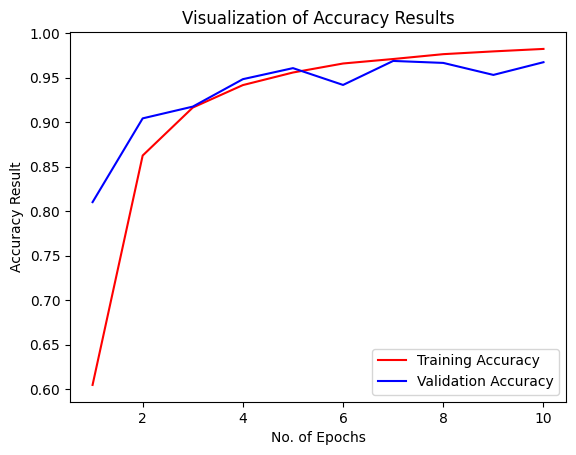

In [101]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color="red",label="Training Accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Results")
plt.legend()
plt.show()

In [102]:
# Some other metrics for model evalutaion

In [103]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [104]:
test_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    # Takes the names of folders as labels
    label_mode="categorical",
    # We didn't take int as we are not doing two class problem but we are solving a multi class problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    # To speed up training process increase batch size
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [105]:
y_prediction=model.predict(test_set)
y_prediction,y_prediction.shape
# 38 probability for all images

550/550 ━━━━━━━━━━━━━━━━━━━━ 86s 156ms/step


(array([[9.9999976e-01, 8.6538243e-10, 5.1837101e-11, ..., 1.7456998e-15,
         6.7646603e-16, 9.5590116e-15],
        [9.9989951e-01, 1.7829417e-06, 2.1990694e-09, ..., 3.6375731e-13,
         8.4991546e-13, 2.5309746e-12],
        [1.0000000e+00, 4.8553633e-11, 1.7923100e-12, ..., 2.3812574e-18,
         4.6263656e-17, 1.5482285e-14],
        ...,
        [1.6378048e-11, 3.2352995e-16, 7.8521058e-11, ..., 2.0248091e-14,
         1.6049607e-14, 1.0000000e+00],
        [1.0474401e-10, 3.5739986e-16, 2.9704371e-11, ..., 1.9184336e-14,
         1.2551199e-13, 1.0000000e+00],
        [2.5006475e-15, 2.8154148e-17, 1.3743513e-15, ..., 3.0914659e-18,
         8.1888672e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [106]:
predicted_categories=tf.argmax(y_prediction,axis=1)
# Vertically count the maximum value

In [107]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [108]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [109]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.93      0.99      0.96       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.87      0.91       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.96      0.

In [112]:
cm=confusion_matrix(y_true,predicted_categories)
cm.shape

(38, 38)

In [113]:
# Visualization of Confusion Matrix 

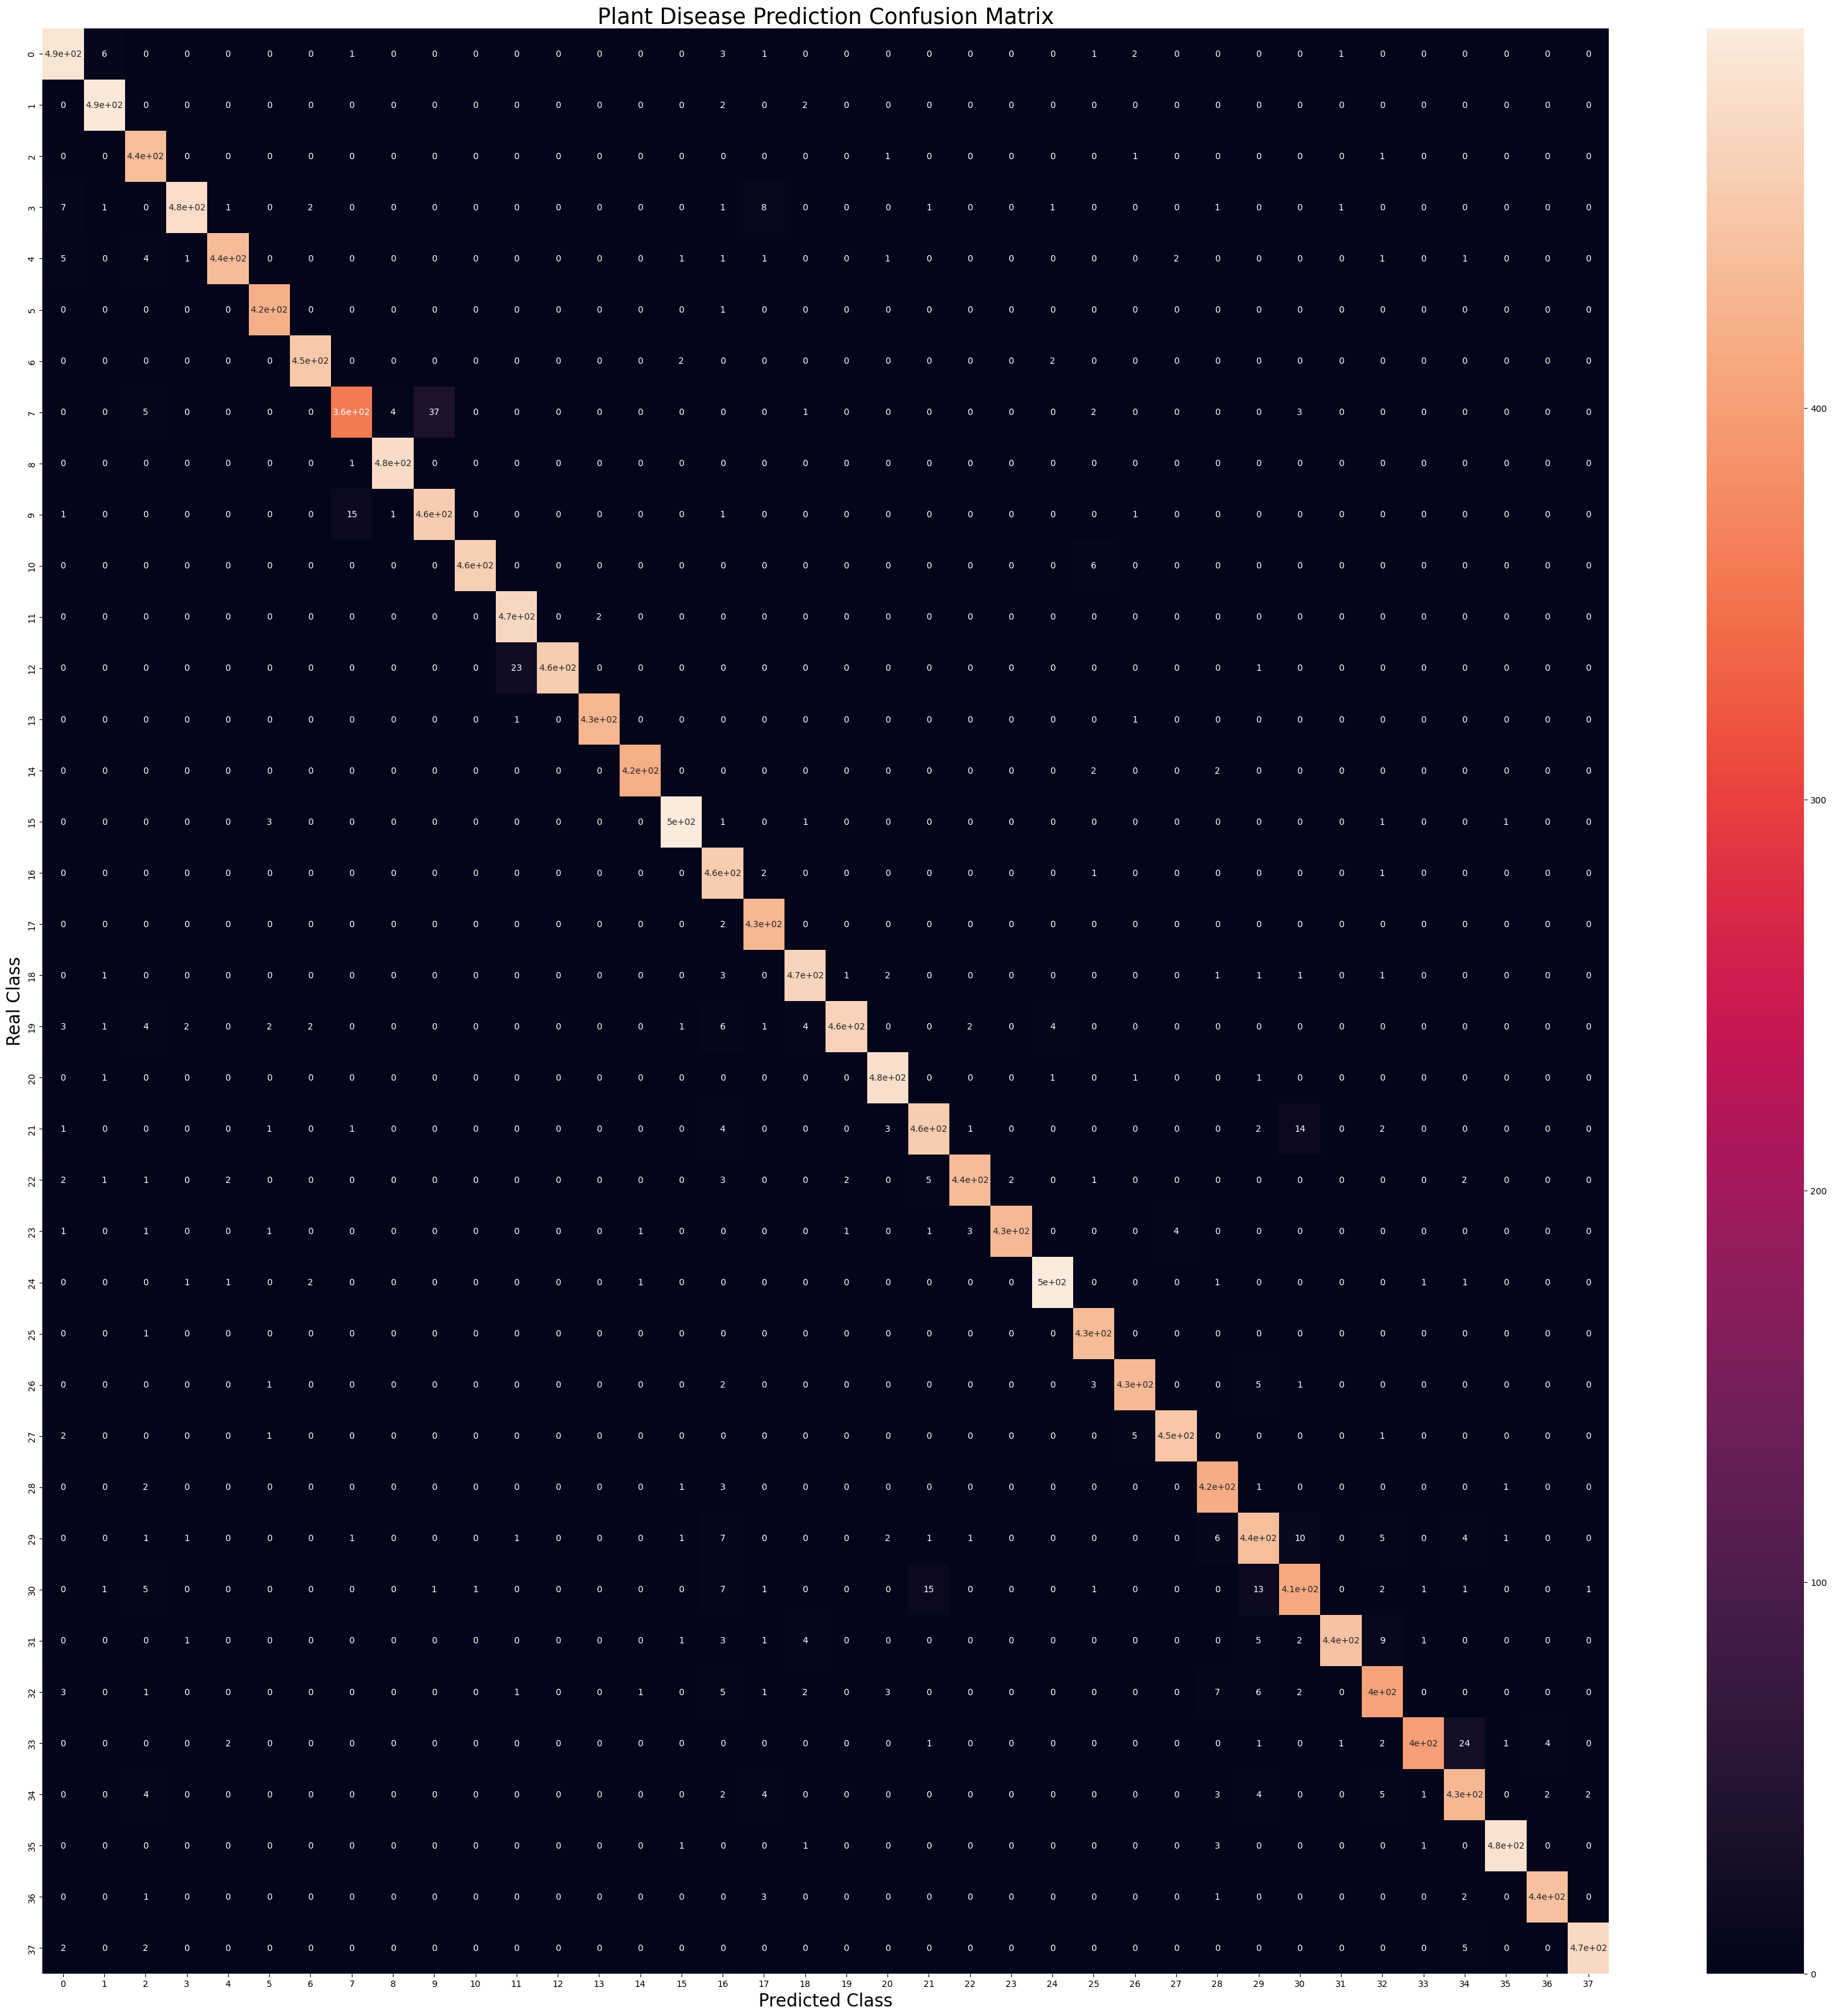

In [114]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Real Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()